In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
#Configure 
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [6]:
#Load dataset
df = pd.read_csv('./data/Social_Network_Ads.csv')
df.head()

,User_ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df = df.drop("User_ID", axis = 1)
df = df.replace('Male',0)
df = df.replace('Female',1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


# Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [9]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,0.51,37.66,69742.50,0.36
std,0.50,10.48,34096.96,0.48
min,0.00,18.00,15000.00,0.00
25%,0.00,29.75,43000.00,0.00
50%,1.00,37.00,70000.00,0.00
75%,1.00,46.00,88000.00,1.00
max,1.00,60.00,150000.00,1.00


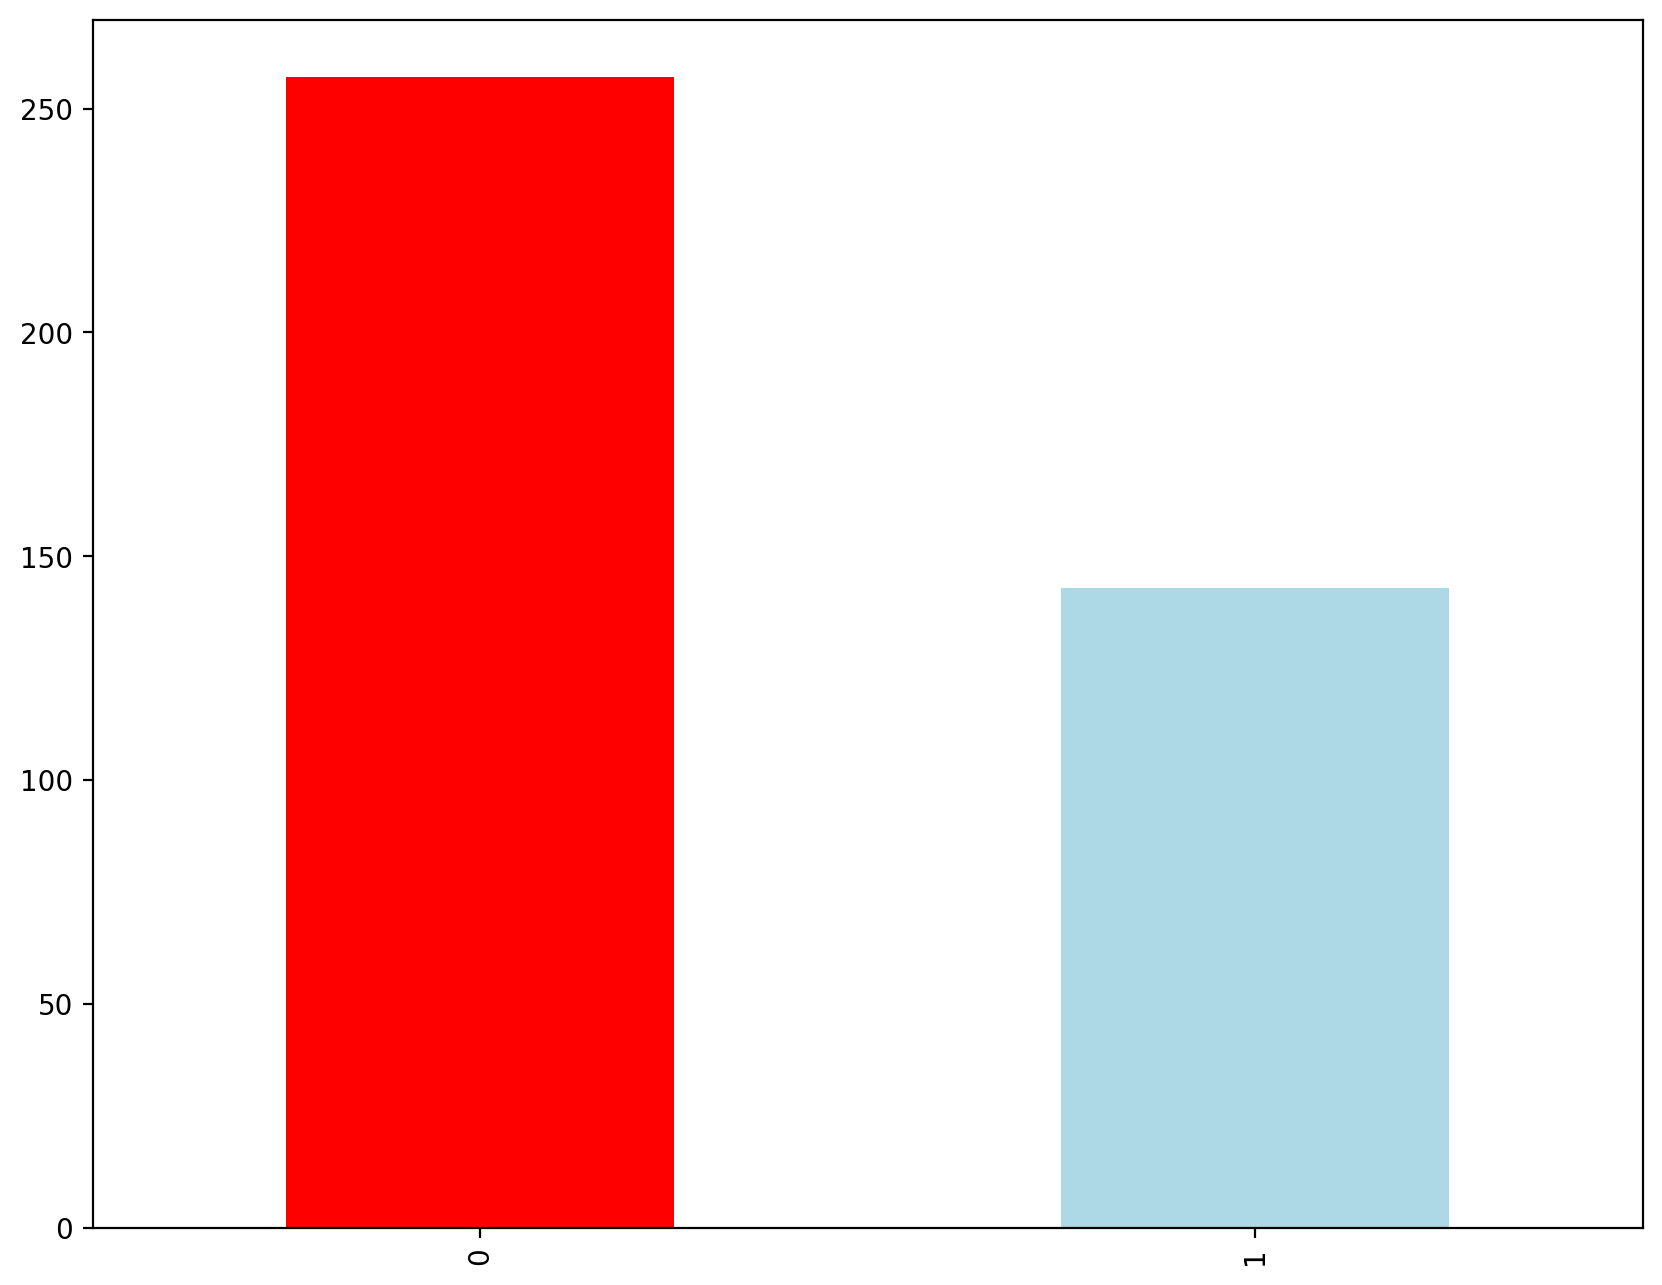

In [10]:
ax = df.Purchased.value_counts().plot(kind='bar', color = ['r', 'lightblue'])

Text(0.5, 1.0, 'Correlation between variables')

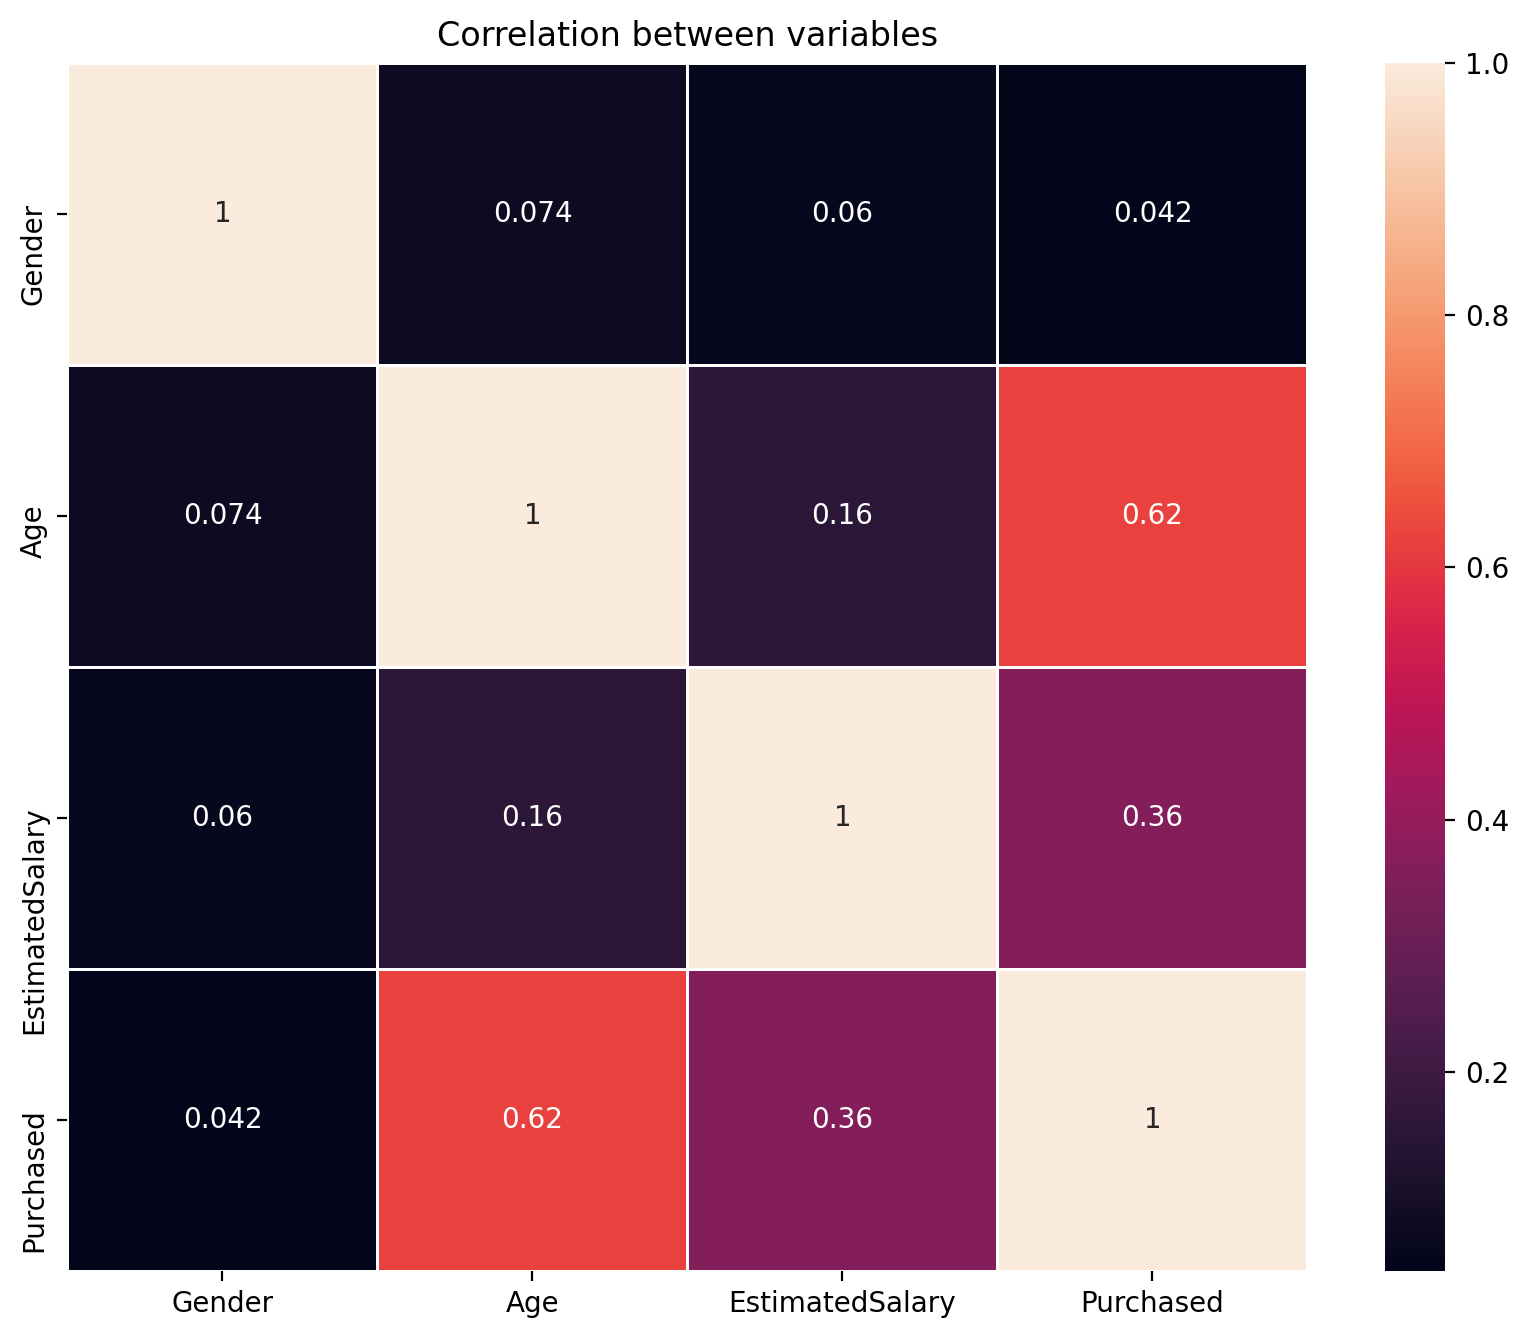

In [11]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.title('Correlation between variables')

In [30]:
X = df[['Gender','Age', 'EstimatedSalary']]
y = df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

In [32]:
#Finally we make the model using logistic regression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print(model_lr.intercept_)
print(model_lr.coef_)

[-0.96121116]
[[-0.09452625  2.09587724  1.11776434]]


In [15]:
#Validate the model with X test and check the performance of the model using confusion metrix
y_pred=model_lr.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.91
Precision: 0.8709677419354839
Recall: 0.84375


Text(0.5, 1419.111111111111, 'Predicted label')

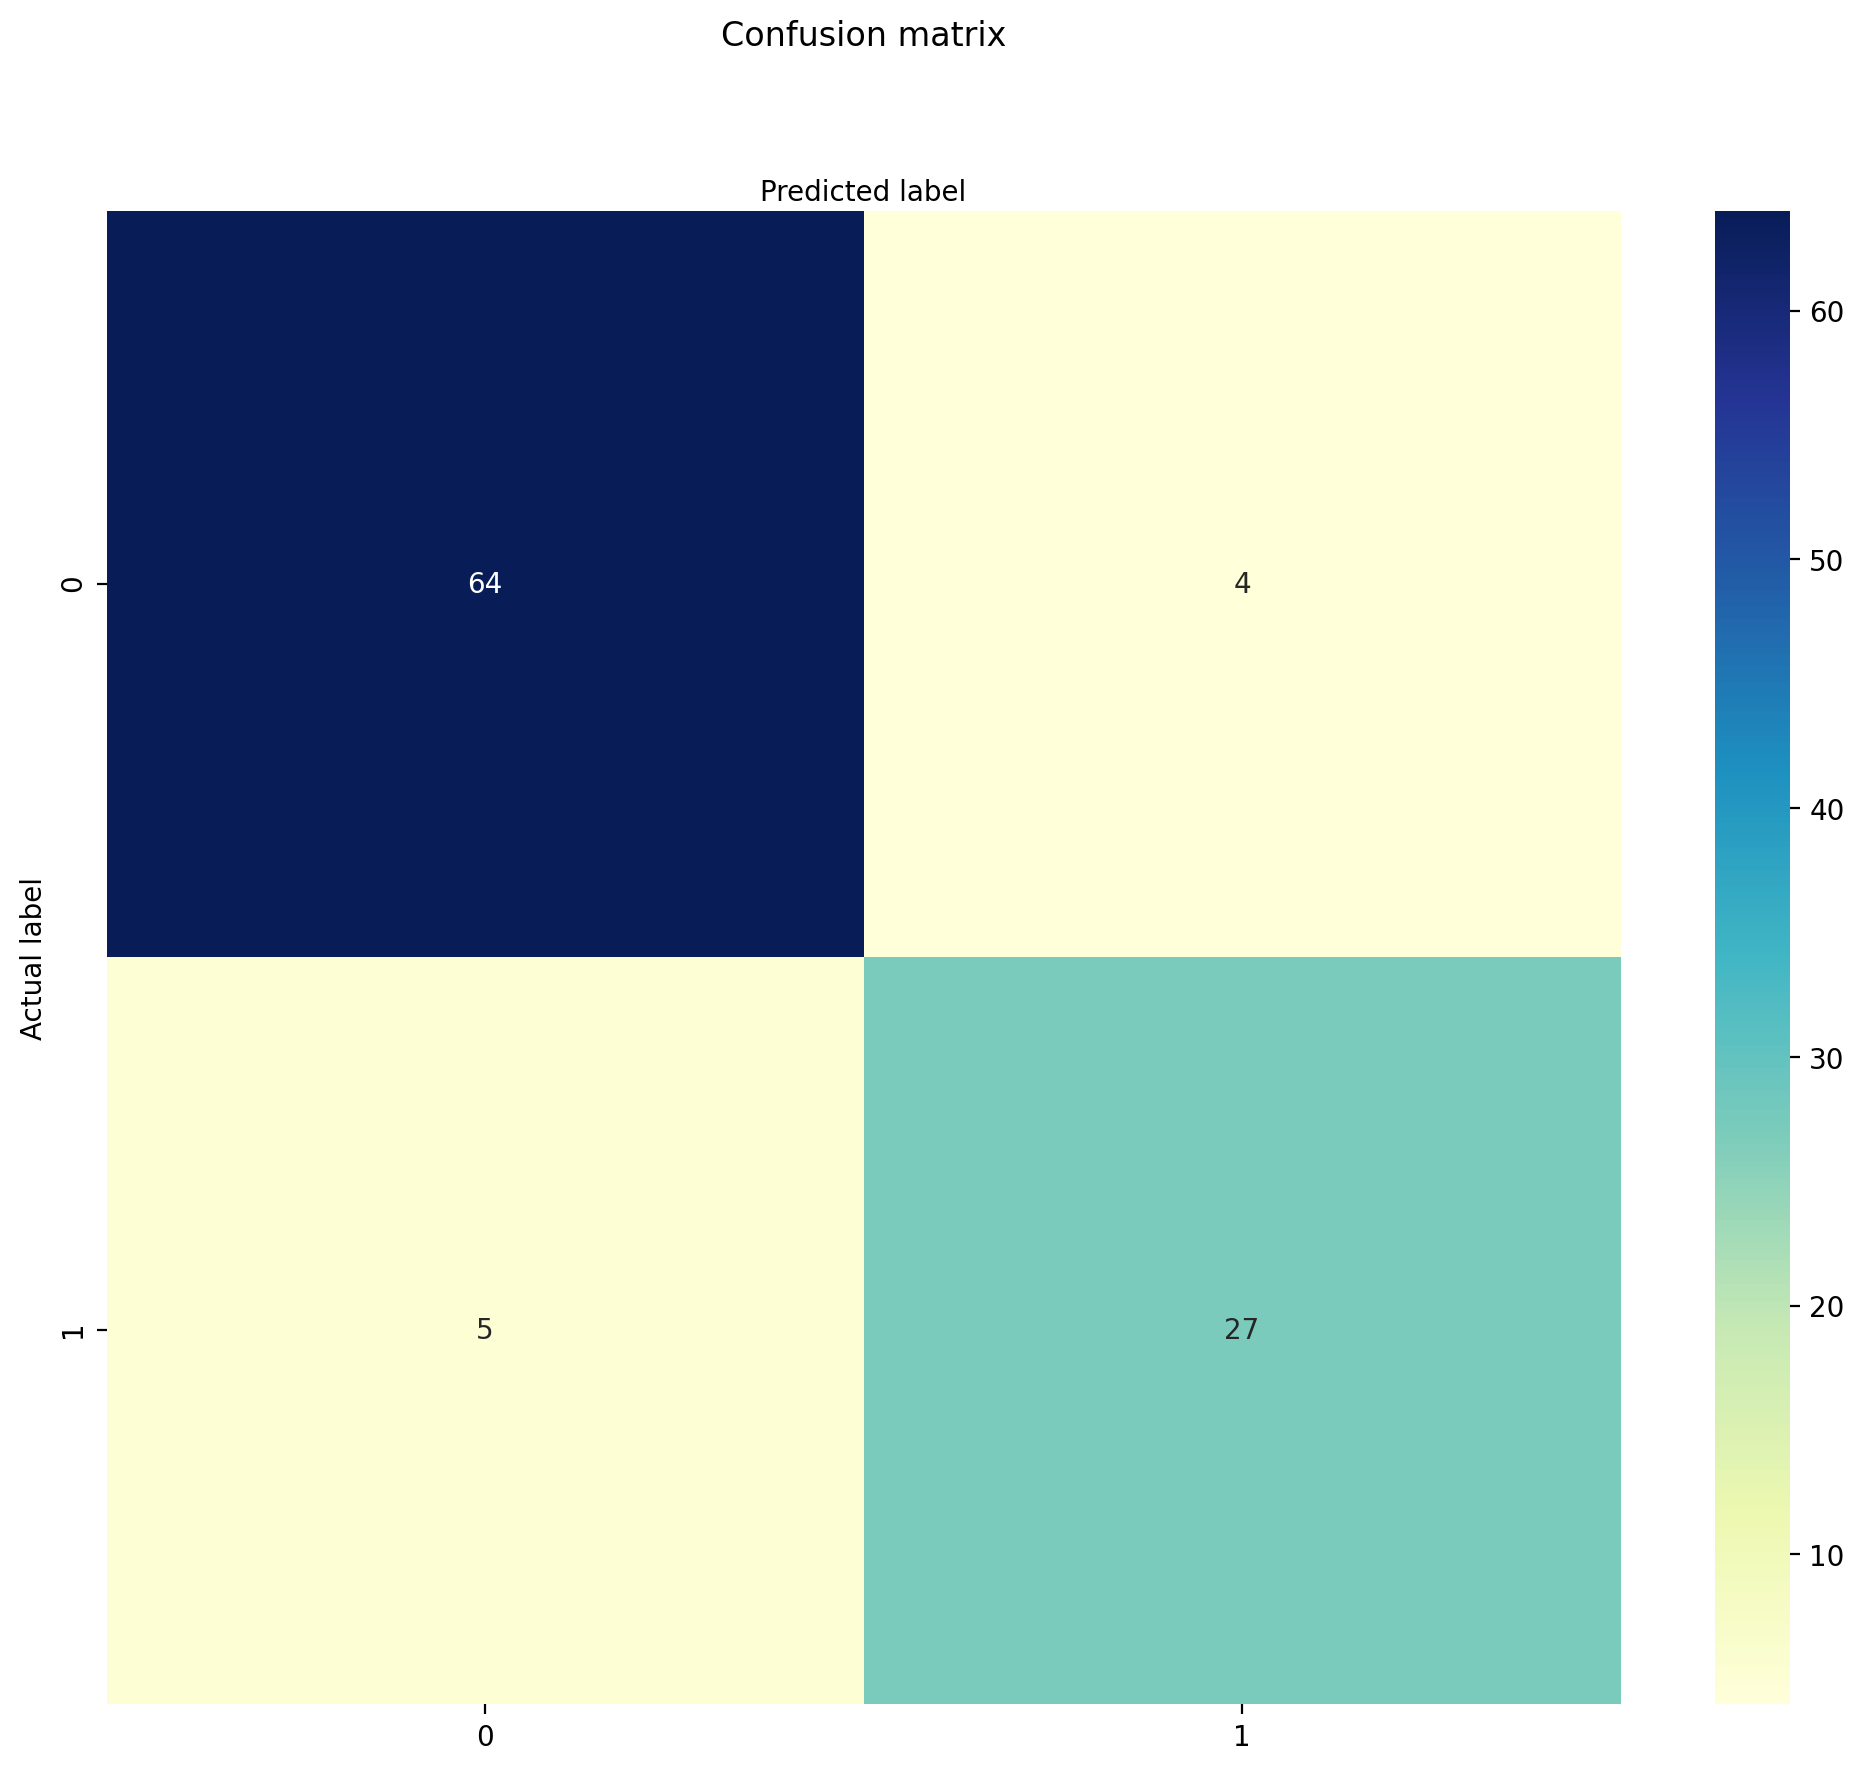

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')